In [2]:
import numpy as np

# Exact diagonilazation
## Householder

In [ ]:
A = np.array([[4,1,-2,2],[1,2,0,1],[-2,0,3,-2],[2,1,-2,-1]], dtype = np.double)
print(A)
N = A.shape[0]
D = np.zeros(N, dtype = np.double)
k = np.zeros(N-1, dtype = np.double)
num = np.zeros(N-1, dtype = np.double)
for i in range(N-2):
    D[i] = A[0,0]
    num = np.copy(A[1:,0].T)
    a2 = np.sum(num**2)
    a = -1 * np.sign(A[1,0]) * np.sqrt(a2)
    scalar = 0.5*(a2 - A[1,0]*a)
    k[i] = a
    num[0] -= a
    Anum = np.copy(A[1:,1:] @ num)
    A = A[1:,1:] -(1/(2*scalar))*np.outer(num,Anum.T) - (1/(2*scalar))*np.outer(Anum,num.T) + np.outer(num,num.T)/(4*scalar**2) * np.dot(num,Anum)
    #print(A2)
    
k[-1] = A[0,1]
D[-2] = A[0,0]
D[-1] = A[1,1]

## Eigenvalues

In [ ]:
def polynomial(a ,D ,k ):
    p0 = D[0] - a
    p1 = (D[1] - a)*p0 - k[1]**2
    
    for i in range(2,N-1):
        p2 = (D[i] - a)*p1-k[i]**2 * p0
        p0 = p1
        p1 = p2
    return p2

# Tight binding

## 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh , eigvalsh 

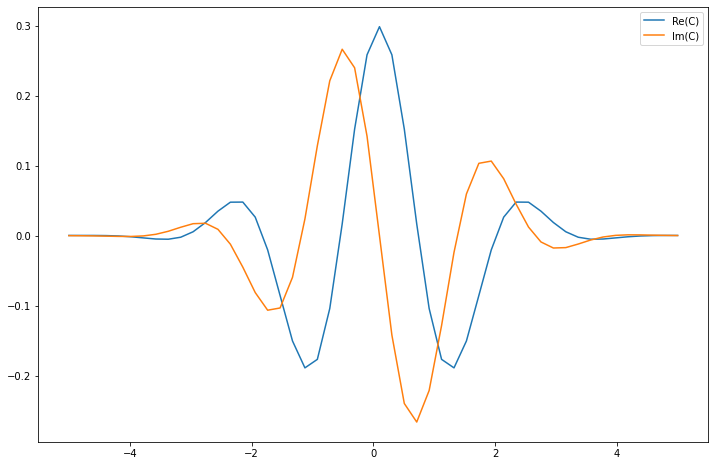

max(abs(S^T * S - I)) =   1.5543122344752192e-15
max(abs(H * S - E * S)) =  1.5987211554602254e-14
[0.49869504 1.4934614  2.48295915 3.46714561 4.44597851]
-2
max(abs(sum(prob, axis = 1))) - 1 =  2.6645352591003757e-15
max(abs(S^T * S - I)) =   1.7763568394002505e-15
max(abs(H * S - E * S)) =  2.3907339121165285e-14
[-1.15447756e-14  1.89326021e-01  1.89326021e-01  7.54318301e-01
  7.54318301e-01]
-2


/tmp/ipykernel_146168/2309259968.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  self.ex[i] = self.Y[i].T.conj() @  (x * self.Y[i])


max(abs(sum(prob, axis = 1))) - 1 =  1.7763568394002505e-15


/tmp/ipykernel_146168/2309259968.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  self.ex[i] = self.Y[i].T.conj() @  (x * self.Y[i])


max(abs(S^T * S - I)) =   2.220446049250313e-15
max(abs(H * S - E * S)) =  1.0658141036401503e-14
[0.04553908 0.18198356 0.40881588 0.72517557 1.12986257]
-2
max(abs(sum(prob, axis = 1))) - 1 =  1.9984014443252818e-15


/tmp/ipykernel_146168/2309259968.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  self.ex[i] = self.Y[i].T.conj() @  (x * self.Y[i])


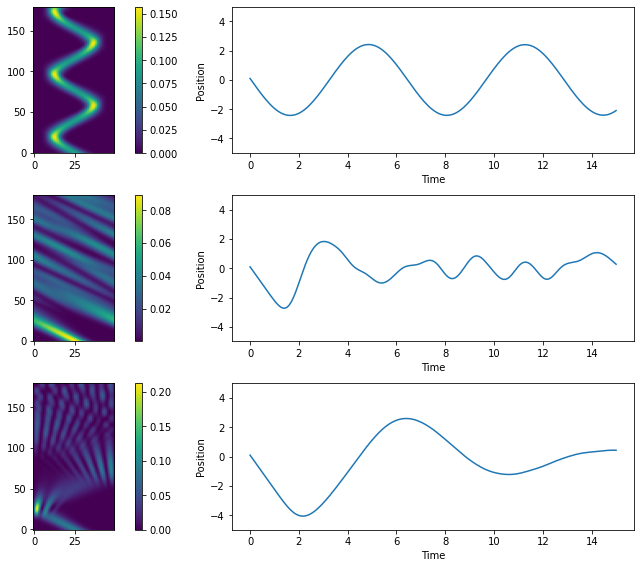

In [41]:
N = 50
x = np.linspace(-5,5,N)

dx = x[1] - x[0]
V = 0
V = 0.5*x**2

class TB1d:
    def __init__(self,x,V):
        self.x = x
        self.V = V
        self.N = len(x)
        self.dx = np.abs(self.x[1] - self.x[0])
        self.t = 1/(2*self.dx**2)
    def makeham(self,boundary = 'periodic'):
        self.H = -1*self.t*np.diag(np.ones(self.N-1),1) + -1*self.t*np.diag(np.ones(self.N-1),-1)
        np.fill_diagonal(self.H, self.V + 2*self.t)
        if boundary == 'periodic':
            self.H[0,-1] = -self.t
            self.H[-1, 0] = -self.t
        elif boundary == 'closed':
            self.H[0,-1] = 0
            self.H[-1, 0] = 0
        else:
            raise ValueError("Invalid Boundary, try \"periodic\" or \"closed\" ")
    def ham(self):
        return self.H
    
    def diagonalize(self):
        
        self.val, self.vec = eigh(self.H) # Call diagonalization routine
        print("max(abs(S^T * S - I)) =  ",np.max(np.abs(self.vec.T @ self.vec - np.eye(self.N)))) # check orthonormality of eigenvectors
        print("max(abs(H * S - E * S)) = ",np.max(np.abs(self.H @ self.vec - self.val * self.vec))) # check eigenvalue equation
    
    def timeevolve(self, initial,T = -1,Nt = -2  ):
        if T == -1 and Nt > 0:
            self.Nt = Nt
            self.time = np.linspace(0,self.T,self.Nt) 
        elif Nt == -2 and T > 1:
            self.T = T
            self.dt = 1/(self.t) # Characteristic time is the invesre of the probability
            self.Nt = int(self.T/self.dt)
            self.time = np.linspace(0,self.T,self.Nt) 
            print(Nt)
        else:
            raise ValueError("Invalid time parameters")

        
        self.C = initial
        self.C /= np.sqrt(np.sum(self.C.conj()*self.C)) # normalize
        
        self.Y = np.zeros( shape=(self.Nt,self.N), dtype = complex)

        for i,t in enumerate(self.time): #Time evolve
            self.Y[i] = np.einsum('i,im,km,m->k', self.C, self.vec,self.vec, np.exp(-1j*self.val*t))    
        self.prob =(self.Y.conj()*self.Y).real
        print("max(abs(sum(prob, axis = 1))) - 1 = ",np.max(np.abs(np.sum(self.prob, axis = 1) - 1))) # The total probability at each time step must remain equal to 1
        #figure = plt.figure(figsize = (12,8) )
        plt.imshow(self.prob, origin = 'lower', aspect = 0.5, interpolation = None)
        plt.colorbar()
        
        
    def expectation(self,name):

        self.ex = np.ones(shape = self.Nt)
        for i in range(self.Nt):
            self.ex[i] = self.Y[i].T.conj() @  (x * self.Y[i]) 


        plt.plot(self.time,self.ex)
        plt.xlabel("Time")
        plt.ylabel("Position")
        plt.ylim(min(x),max(x))
        plt.savefig(name)
        
        
    def create_anim(self,name = ' '):
        if name == ' ':
            self.name = "tb1d" + str(np.random.randint(1,100)) + ".mp4"
        else: 
            self.name = name + ".mp4"
        
        import matplotlib.animation as animation

        fps = 30
        nSeconds = 30

        fig = plt.figure( figsize=(8,8) )

        self.x = np.arange(self.N)
        a = self.prob[0]
        im, = plt.plot(self.x,a, label = "Probability")
        plt.legend()
        plt.ylim(0,1)

        def animate_func(i):
            if i % fps == 0:
                print( '.', end ='' )

            im.set_data(self.x,self.prob[i])
            return [im]

        anim = animation.FuncAnimation(fig,animate_func,frames = self.Nt, interval = 1000 / fps)
        anim.save(self.name, fps=fps, extra_args=['-vcodec', 'libx264'])
        plt.show()

C = np.zeros(shape = (N), dtype = complex) 
        
l = 20
i0 = int(N/2)
k0 = (2*np.pi/N) * 4

for ic in range(N):
    S = 0
    for kc in range(N):
        S += np.exp(-l*( (2*np.pi/N) * kc - k0)**2) * np.exp(-1j * (2*np.pi/N)*kc * (ic - i0) )
    C[ic] = S
    
    

C /= np.sqrt(np.sum(C.conj()*C)) # normalize
figure = plt.figure( figsize = (12,8)) 


plt.plot(x,(C.real),label = "Re(C)")
plt.plot(x,(C.imag), label = "Im(C)")
plt.legend()
plt.savefig("Initial")
plt.show()
 
figure = plt.figure( figsize = (12,8)) 

harm = TB1d(x,V)
harm.makeham(boundary = 'closed')
harm.diagonalize()
print(harm.val[0:5])
plt.subplot(3,2,1);
harm.timeevolve(C,T = 15)
plt.subplot(3,2,2)
harm.expectation("harm")
#harm.create_anim("test123")

free = TB1d(x,0)
free.makeham(boundary = 'periodic')
free.diagonalize()
print(free.val[0:5])
plt.subplot(3,2,3)
free.timeevolve(C,T = 15)
plt.subplot(3,2,4)
free.expectation("freeopen")
#free.create_anim("free_particle_with_momentum")

freec = TB1d(x,0)
freec.makeham(boundary = 'closed')
freec.diagonalize()
print(freec.val[0:5])
plt.subplot(3,2,5)
freec.timeevolve(C,T = 15)
plt.subplot(3,2,6)
freec.expectation("freeclosed")

plt.tight_layout(pad = 1.1)
plt.savefig("fig1.png", bbox_inches = 'tight')

plt.show()


max(abs(S^T * S - I)) =   3.1086244689504383e-15
max(abs(H * S - E * S)) =  1.1657341758564144e-14


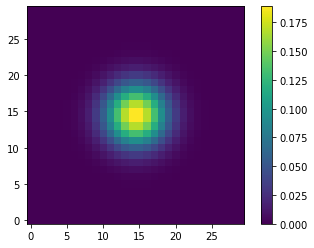

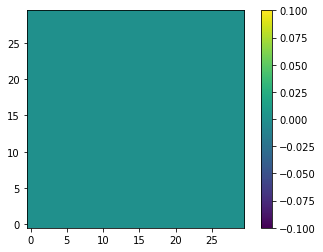

max(abs(sum(prob, axis = 1))) - 1 =  1.3322676295501878e-15


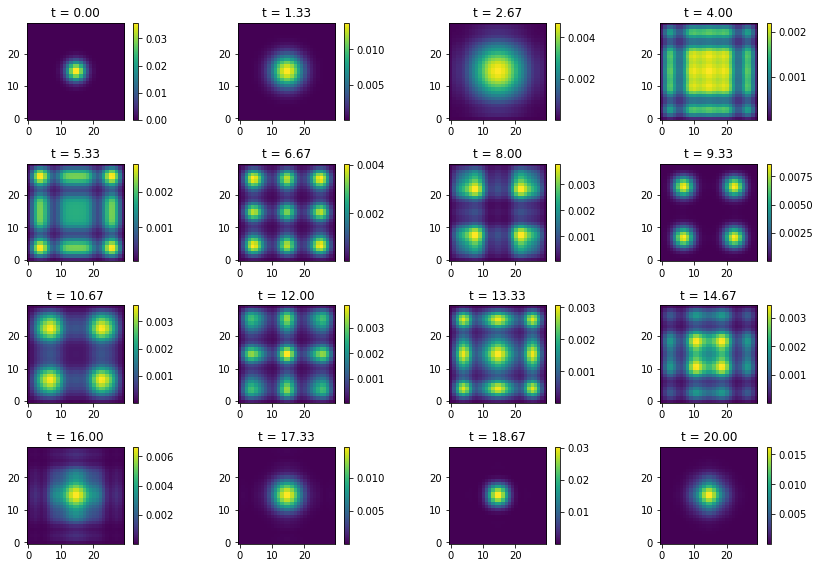

max(abs(S^T * S - I)) =   3.552713678800501e-15
max(abs(H * S - E * S)) =  2.5295384932346627e-14


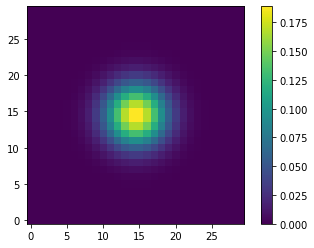

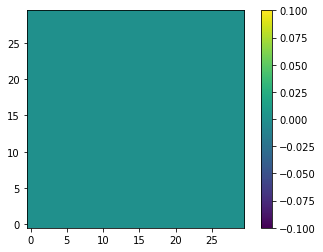

max(abs(sum(prob, axis = 1))) - 1 =  2.7755575615628914e-15


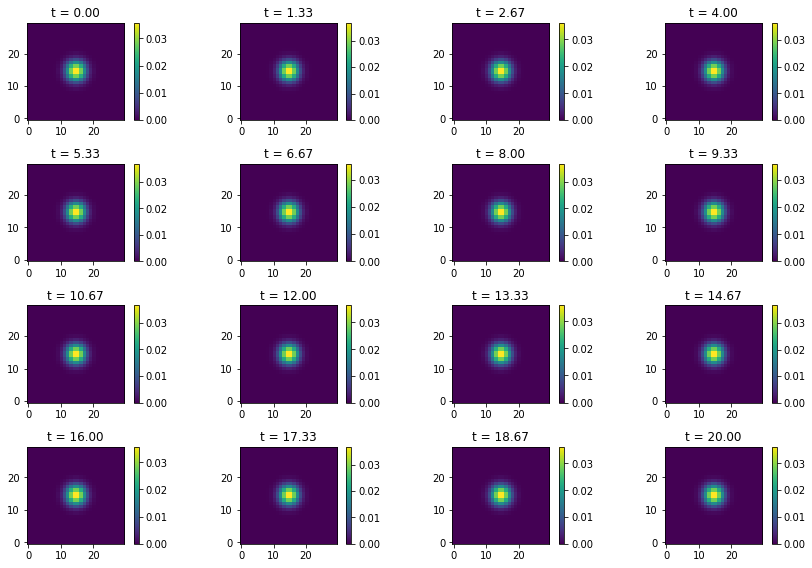

In [21]:
class TB2d:
    def __init__(self,x,y,V):
        self.x = x
        self.y = y
        self.V = V
        self.N = len(x)
        self.dx = np.abs(self.x[1] - self.x[0])
        self.t = 1/(2*self.dx**2)
    def makeham(self,boundary = 'periodic'):
        diag1 = np.ones(self.N**2-1)
        diag1[self.N-1::self.N] = 0
        diag2 = np.zeros(self.N**2 -(self.N-1) )
        diag2[::self.N] = 1
        self.H = -1*self.t*np.diag(diag1,1) + -1*self.t*np.diag(diag1.conj(),-1) + -1*self.t*np.diag(np.ones(self.N**2-self.N),-self.N) + -1*self.t*np.diag(np.ones(self.N**2-self.N),self.N) 
        np.fill_diagonal(self.H, self.V + 4*self.t )

        if boundary == 'periodic':
            self.H +=  -1*self.t*np.diag(diag2,-(self.N-1)) + -1*self.t*np.diag(diag2,+(self.N-1)) + -1*self.t*np.diag(np.ones(self.N),self.N**2 - self.N ) + -1*self.t*np.diag(np.ones(self.N),-(self.N**2 - self.N) )
        elif boundary == 'closed':
            pass
        else:
            raise ValueError("Invalid Boundary, try \"periodic\" or \"closed\" ")
    def ham(self):
        return self.H
    
    def diagonalize(self):
        
        self.val, self.vec = eigh(self.H) # Call diagonalization routine
        print("max(abs(S^T * S - I)) =  ",np.max(np.abs(self.vec.T @ self.vec - np.eye(self.N**2)))) # check orthonormality of eigenvectors
        print("max(abs(H * S - E * S)) = ",np.max(np.abs(self.H @ self.vec - self.val * self.vec))) # check eigenvalue equation
    
    def timeevolve(self, initial,T = -1,Nt = -2  ):
        if T > 0 and Nt > 0:
            self.T = T
            self.Nt = Nt
            self.time = np.linspace(0,self.T,self.Nt) 
        elif Nt == -2 and T > 1:
            self.T = T
            self.dt = 1/(self.t) # Characteristic time is the invesre of the probability
            self.Nt = int(self.T/self.dt)
            self.time = np.linspace(0,self.T,self.Nt) 
            print(Nt)
        else:
            raise ValueError("Invalid time parameters")

        
        self.C = initial
        self.C /= np.sqrt(np.sum(self.C.conj()*self.C)) # normalize
        plt.imshow(self.C.real, origin = 'lower')
        plt.colorbar()
        plt.show()
        plt.imshow(self.C.imag, origin = 'lower')
        plt.colorbar()
        plt.show()
        self.C = self.C.flatten()

        self.Y = np.zeros( shape=(self.Nt,self.N**2), dtype = complex)

        for i,t in enumerate(self.time): #Time evolve
            self.Y[i] = np.einsum('i,im,km,m->k', self.C, self.vec,self.vec, np.exp(-1j*self.val*t))    
        self.prob =(self.Y.conj()*self.Y).real
        print("max(abs(sum(prob, axis = 1))) - 1 = ",np.max(np.abs(np.sum(self.prob, axis = 1) - 1))) # The total probability at each time step must remain equal to 1
        figure = plt.figure(figsize = (12,8) )
        self.prob = self.prob.reshape(self.Nt,self.N,self.N)
        #plt.imshow(self.prob, origin = 'lower')
        #plt.colorbar()
        #plt.show()
        
    def expectation(self,name):

        self.ex = np.ones(shape = self.Nt)
        for i in range(self.Nt):
            self.ex[i] = self.Y[i].T.conj() @  (np.arange(self.N**2) * self.Y[i]) 


        #self.ex2 = np.zeros(shape = (self.Nt,N))
        self.exy = self.ex // N
        self.exx = self.ex % N
        
        ax = plt.axes(projection='3d')
        ax.plot(self.exx,self.exy,self.time)
        plt.xlim(0,N)
        plt.ylim(0,N)
        #plt.ylabel("Position")
        #plt.ylim(min(x),max(x))
        #plt.savefig(name)
        plt.show()
        
    def create_anim(self,name = ' '):
        if name == ' ':
            self.name = "tb2d" + str(np.random.randint(1,1000)) + ".mp4"
        else: 
            self.name = name + ".mp4"
        
        import matplotlib.animation as animation

        fps = 30
        nSeconds = 30

        fig = plt.figure( figsize=(8,8) )

        im = plt.imshow(self.prob[0],origin = 'lower')
        plt.colorbar()
      

        def animate_func(i):
            if i % fps == 0:
                print( '.', end ='' )

            im.set_data(self.prob[i])
            return [im]

        anim = animation.FuncAnimation(fig,animate_func,frames = self.Nt, interval = 1000 / fps)
        anim.save(self.name, fps=fps, extra_args=['-vcodec', 'libx264'])
        plt.show()



N = 30
x = np.linspace(-5,5,N)
y = np.linspace(-5,5,N)
X,Y = np.meshgrid(x,y)

dx = x[1] - x[0]

C = np.zeros(shape = (N,N), dtype = complex) 


l = 20
kx0 = (2*np.pi/N) * 0
ky0 = (2*np.pi/N) * 3

j0 = int(N*0.7)
i0 = int(N/2)


for jc in range(N):
    for ic in range(N):
        S = 0
        for kcx in range(N):
            for kcy in range(N):
                S += np.exp(-l*( (2*np.pi/N) * kcx - kx0)**2) * np.exp(-l*( (2*np.pi/N) * kcy - ky0)**2)  * np.exp(-1j * (2*np.pi/N)*kcy * (jc - j0) ) * np.exp(-1j * (2*np.pi/N)*kcx * (ic - i0) )
        C[ic,jc] = S

C = np.exp(-(X**2 + Y**2)/2)
      
#V = 0.5*(X**2 + Y**2).flatten()
V = 0

harm2 = TB2d(x,y,V)
harm2.makeham('closed')
harm2.diagonalize()
harm2.timeevolve(C,20,16)
#harm2.create_anim()

for i,t in enumerate(harm2.time):
    plt.subplot(4,4,i+1)
    plt.imshow(harm2.prob[i], origin = 'lower', interpolation = None)
    plt.title("t = {:.2f}".format(t))
    plt.colorbar()

plt.tight_layout(pad = 1.1)
plt.savefig("fig3.png", bbox_inches = 'tight')
plt.show()


V = 0.5*(X**2 + Y**2).flatten()

harm2 = TB2d(x,y,V)
harm2.makeham('closed')
harm2.diagonalize()
harm2.timeevolve(C,20,16)
#harm2.create_anim()

for i,t in enumerate(harm2.time):
    plt.subplot(4,4,i+1)
    plt.imshow(harm2.prob[i], origin = 'lower', interpolation = None)
    plt.title("t = {:.2f}".format(t))
    plt.colorbar()

plt.tight_layout(pad = 1.1)
plt.savefig("fig4.png", bbox_inches = 'tight')
plt.show()

/tmp/ipykernel_102343/4206370466.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  self.ex[i] = self.Y[i].T.conj() @  (np.arange(self.N**2) * self.Y[i])


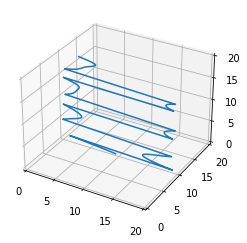

In [39]:
harm2.expectation('asd')

## 2D

dx = 0.2222222222222222 
t = 10.125 


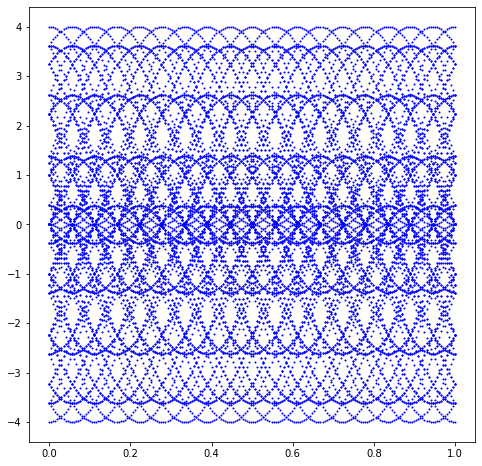

In [380]:


N = 10
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)

dx = x[1] - x[0]
#V = 0
V = 0.5*(X**2 + Y**2).flatten()
print(f"dx = {dx} ")
t = 1/(2*dx**2)
#t = 1
print(f"t = {t} ")
m = np.tile(np.arange(N),N)
#diag1 = np.ones(N*N-1)*np.exp(1j*m*phi)
diag2 = np.zeros(N*N -(N-1) )
diag2[::N] = 1
diag1[N-1::N] = 0
#print(diag1)
#H = -1*t*np.diag(diag1,1) + -1*t*np.diag(diag1,-1) + -1*t*np.diag(np.ones(N*N-N),-N) + -1*t*np.diag(np.ones(N*N-N),N) + -1*t*np.diag(diag2,-(N-1)) + -1*t*np.diag(diag2,+(N-1)) + -1*t*np.diag(np.ones(N),N*N - N ) + -1*t*np.diag(np.ones(N),-(N*N - N) )
#H = -1*t*np.diag(diag1,1) + -1*t*np.diag(diag1,-1) + -1*t*np.diag(np.ones(N*N-N),-N) + -1*t*np.diag(np.ones(N*N-N),N)
np.fill_diagonal(H, V + 4*t)
#H[0,-1] = 0# -t
#H[-1, 0] = 0 #-t
#print(H)
m = np.tile(np.arange(N),N)
fig = plt.figure( figsize=(8,8) )
x = np.ones(N*N)
flux = np.linspace(0*np.pi,1*np.pi,200)
for f in flux:
    diag1 = np.ones(N*N-1)*np.exp(1j*m[:-1]*f)
    diag1[N-1::N] = 0
    H = -1*t*np.diag(diag1,1) + -1*t*np.diag(diag1.conj(),-1) + -1*t*np.diag(np.ones(N*N-N),-N) + -1*t*np.diag(np.ones(N*N-N),N) + -1*t*np.diag(diag2,-(N-1)) + -1*t*np.diag(diag2,+(N-1)) + -1*t*np.diag(np.ones(N),N*N - N ) + -1*t*np.diag(np.ones(N),-(N*N - N) )
    np.fill_diagonal(H, V )
    val = eigvalsh(H)
    plt.scatter(f*x/np.pi,val/t,color = 'blue',s = 1)
#val, vec = eigh(H) # Call diagonalization routine
plt.show()
#print(H)


In [367]:
np.tile(np.arange(4),4)



array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [324]:
'''
ground = vec[:,0].reshape(N,N)
g = np.exp(-(X**2 + Y**2)/2)
g *= 1/(np.sqrt(np.sum(g*g)))
print(np.max(np.abs(g - ground)))
plt.imshow(ground, origin = 'lower')
plt.colorbar()
plt.show()
plt.imshow(g, origin = 'lower')
plt.colorbar()
plt.show()
'''

"\nground = vec[:,0].reshape(N,N)\ng = np.exp(-(X**2 + Y**2)/2)\ng *= 1/(np.sqrt(np.sum(g*g)))\nprint(np.max(np.abs(g - ground)))\nplt.imshow(ground, origin = 'lower')\nplt.colorbar()\nplt.show()\nplt.imshow(g, origin = 'lower')\nplt.colorbar()\nplt.show()\n"

[-180.45065648 -176.95801927 -176.03350707 -176.03350707 -175.11382496
 -172.54086987 -172.54086987 -170.69667555 -170.69667555 -164.97779701
 -163.21444022 -163.21444022 -161.46993097 -160.56064761 -160.56064761
 -159.72180301]


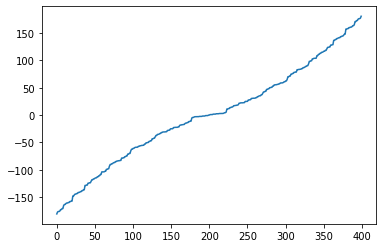

In [325]:
print(val[0:16])
plt.plot(val)
plt.show()

In [233]:
np.max(np.abs(vec.T @ vec - np.eye(N*N))) # check orthonormality of eigenvectors

3.552713678800501e-15

In [234]:
np.max(np.abs(H @ vec - val * vec)) # check eigenvalue equation

1.5987211554602254e-14

In [235]:
dt = 1/(4*t)
T = 20
Nt = int(T/dt)
time = np.linspace(0,T,Nt) 
print(Nt)

144


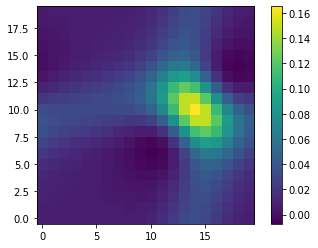

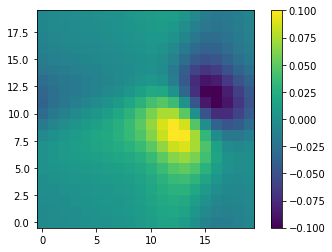

In [240]:
C = np.zeros(shape = (N,N), dtype = complex) 
#C[int(N/2) - 10] = 0.5
#C[int(N/2) + 10] = 0.5

#C = np.exp(-(X**2 + Y**2)/2).flatten()
#C[int(N*N/2 + N/2)] = 1

l = 2
kx0 = (2*np.pi/N) * 0
ky0 = (2*np.pi/N) * 0.1

j0 = int(N*0.7)
i0 = int(N/2)


for jc in range(N):
    for ic in range(N):
        S = 0
        for kcx in range(N):
            for kcy in range(N):
                S += np.exp(-l*( (2*np.pi/N) * kcx - kx0)**2) * np.exp(-l*( (2*np.pi/N) * kcy - ky0)**2)  * np.exp(-1j * (2*np.pi/N)*kcy * (jc - j0) ) * np.exp(-1j * (2*np.pi/N)*kcx * (ic - i0) )
        C[ic,jc] = S

        

#C = np.sum(np.exp(-l*(k-k0))*np.exp(-1j*k*(j-j0)))
#C = np.einsum('i,im->m', np.exp(-l*(k-k0)),np.exp(-1j*k*(j-j0)))    


C /= np.sqrt(np.sum(C.conj()*C)) # normalize
plt.imshow(C.real, origin = 'lower')
plt.colorbar()
#plt.plot(x,(C.reshape(N,N).real))
plt.show()
plt.imshow(C.imag, origin = 'lower')
plt.colorbar()
#plt.plot(x,(C.reshape(N,N).imag))
plt.show()
C = C.flatten()
Y = np.zeros( shape=(Nt,N*N), dtype = complex)
#YR = np.zeros( shape=(Nt,N))
#YI = np.zeros( shape=(Nt,N))
#s = 0
#for k in range(N):
#    #print(k,N)
#    s = 0
#    for i in range(N):
#        for m in range(N):
#            s += C[i]*vec[i,m]*vec[k,m]*np.cos(val[m]*t)
#    YR[k] = s


for i,t in enumerate(time):
    #print(i)
    Y[i] = np.einsum('i,im,km,m->k', C, vec,vec, np.exp(-1j*val*t))    
#    #YR[i] = np.einsum('i,im,km,m->k', C, vec,vec, np.cos(val*t))    
#    #YI[i] = np.einsum('i,im,km,m->k', -1*C, vec,vec, np.sin(val*t))    
prob =(Y.conj()*Y).real


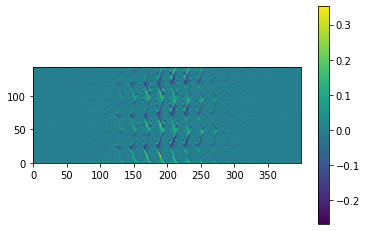

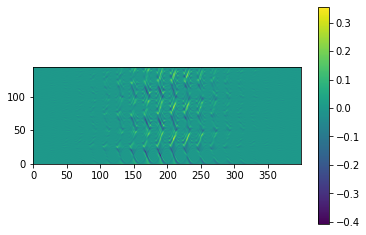

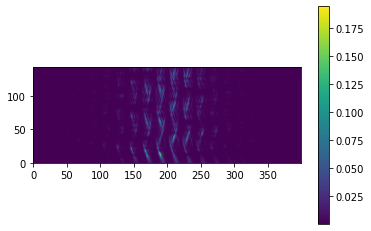

In [241]:
plt.imshow(Y.real, origin = 'lower')
plt.colorbar()
plt.show()
plt.imshow(Y.imag, origin = 'lower')
plt.colorbar()
plt.show()
plt.imshow(prob, origin = 'lower')
plt.colorbar()
plt.show()

In [242]:
np.max(np.abs(np.sum(prob, axis = 1) - 1)) # The total probability at each time step must remain equal to 1

1.887379141862766e-15

In [1]:
import matplotlib.animation as animation

fps = 30
nSeconds = 30

fig = plt.figure( figsize=(8,8) )
prob = prob.reshape(Nt,N,N).real
im = plt.imshow(prob[0],origin = 'lower')
plt.colorbar()


def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_data(prob[i])
    return [im]

anim = animation.FuncAnimation(fig,animate_func,frames = Nt, interval = 1000 / fps)
anim.save('tight_binding_2d.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
plt.show()

NameError: name 'plt' is not defined